Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

 * 2022/06/28 - updated
 * 2021/12/13 - initial revision

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://oa-icc.ipsl.fr/checking/OAICC_20230419.csv")
df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country,Year
0,"Adeleke, B., Robertson-Andersson, D., & Moodle...",doi:10.1016/j.heliyon.2020.e04744,NaN,Not included,< 2 carbonate chemistry parameters,South Africa,2020
1,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016
2,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014
3,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018
4,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019
...,...,...,...,...,...,...,...
3392,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013
3393,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014
3394,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019
3395,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002


In [16]:
df['Year'].unique()

array([2020, 2016, 2014, 2018, 2019, 2012, 2013, 2011, 2022, 2017, 2015,
       2021, 2009, 1999, 2010, 2005, 2008, 2007, 1995, 2002, 2023, 2001,
       2004, 2006, 1993, 2000, 1997, 2003, 1991, 1994, 1998, 1996, 1967])

In [17]:
df['Year'].replace('in press', '2022', inplace=True)
df['Year'].unique()

array([2020, 2016, 2014, 2018, 2019, 2012, 2013, 2011, 2022, 2017, 2015,
       2021, 2009, 1999, 2010, 2005, 2008, 2007, 1995, 2002, 2023, 2001,
       2004, 2006, 1993, 2000, 1997, 2003, 1991, 1994, 1998, 1996, 1967])

In [18]:
df['Year'] = df['Year'].astype(int)

In [19]:
#df = df[df['Year'] < 2022]

In [20]:
df['Reason for non inclusion'].unique()

array(['< 2 carbonate chemistry parameters', 'No answer from authors',
       'Data lost', nan], dtype=object)

In [21]:
a = df[df['Included/Not included'] == 'Included']
b = df[df['Reason for non inclusion'] == 'No answer from authors']
c = df[df['Reason for non inclusion'] == '< 2 carbonate chemistry parameters']
d = df[df['Reason for non inclusion'] == 'Data lost']

In [22]:
a1 = a.groupby('Year').size().cumsum()
b1 = b.groupby('Year').size().cumsum()
c1 = c.groupby('Year').size().cumsum()
d1 = d.groupby('Year').size().cumsum()
d1

Year
1991     1
1993     2
1997     3
1999     6
2001     8
2003    10
2006    12
2012    14
2017    15
2018    16
dtype: int64

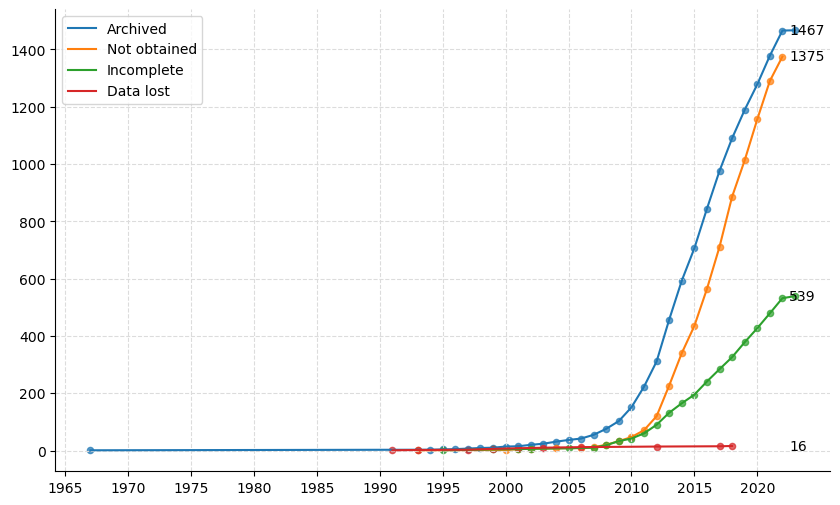

In [23]:
fig, ax = plt.subplots(figsize=[10,6])

scatterSize = 20

#==============================
ax.plot(a1, label="Archived")
ax.scatter(x=a1.index, y=a1, marker='o', alpha=0.7, s=scatterSize)
#==============================
ax.plot(b1, label="Not obtained")
ax.scatter(x=b1.index, y=b1, marker='o', alpha=0.7, s=scatterSize)
#==============================
ax.plot(c1, label="Incomplete")
ax.scatter(x=c1.index, y=c1, marker='o', alpha=0.7, s=scatterSize)
#==============================
ax.plot(d1, label="Data lost")
ax.scatter(x=d1.index, y=d1, marker='o', alpha=0.7, s=scatterSize)

#==============================
for l in ax.lines:
    x,y = l.get_data()
    ax.annotate(y[-1], 
                xy=(2022, y[-1]),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points', fontsize=10)

#==============================
ax.grid(axis='both', zorder=0, color='gainsboro', linestyle='--')
ax.legend()
#ax.set_xlim(1965, 2025)
ax.xaxis.set_ticks(np.arange(1965, 2025, 5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()